Image loaded successfully using PIL


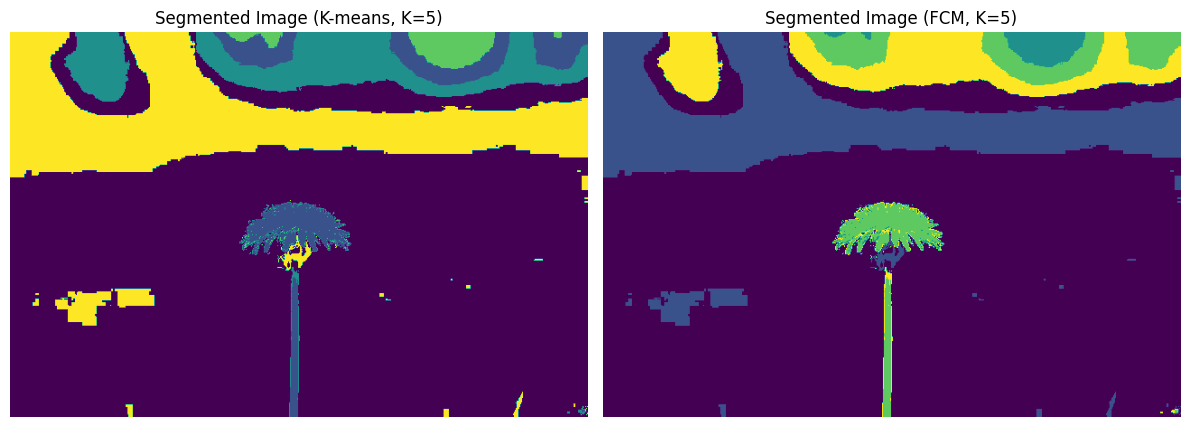

In [8]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image

def fcm_segmentation(image_array, K, m, eps, max_its):
    num = image_array.shape[0]
    d = image_array.shape[1]

    u = np.random.random((num, K))
    u = u / np.sum(u, axis=1)[:, np.newaxis]

    it = 0
    while it < max_its:
        it += 1

        um = u ** m
        center = np.dot(um.T, image_array) / np.sum(um.T, axis=1)[:, np.newaxis]
        distance = np.linalg.norm(image_array[:, np.newaxis] - center, axis=-1) ** 2
        new_u = 1. / np.sum((distance[:, :, np.newaxis] / distance[:, np.newaxis, :]) ** (2 / (m - 1)), axis=-1)

        if np.sum(np.abs(new_u - u)) < eps:
            break

        u = new_u

    return np.argmax(u, axis=1)

# 图像路径
image_path = r"D:\暂时文件\04_2200170282_廖林海\picture.webp"

# 使用PIL加载图像
try:
    image = Image.open(image_path)
    image = image.convert('RGB')  # 转换为RGB模式
    image_array = np.array(image)
    print("Image loaded successfully using PIL")
except Exception as e:
    print(f"Error: Unable to load image at {image_path}. Exception: {e}")

# 检查图像是否加载成功
if image_array is not None:
    # 将图像数据转换为二维数组
    image_array_flat = image_array.reshape(-1, 3)

    # 定义KMeans模型，这里设定聚类数为K
    K = 5  # 可根据需要调整聚类数
    kmeans = KMeans(n_clusters=K, random_state=0)

    # 对图像数据进行聚类
    labels_kmeans = kmeans.fit_predict(image_array_flat)

    # 使用FCM算法进行聚类
    m = 2  # FCM的加权指标
    eps = 0.01  # FCM的差别阈值
    max_its = 100  # FCM的最大迭代次数
    labels_fcm = fcm_segmentation(image_array_flat, K, m, eps, max_its)

    # 重新构建图像（将每个像素的颜色值替换为其所属聚类中心的颜色值）
    segmented_image_kmeans = labels_kmeans.reshape(image_array.shape[:2])
    segmented_image_fcm = labels_fcm.reshape(image_array.shape[:2])

    # 显示分割后的图像
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(segmented_image_kmeans, cmap='viridis')  # 使用viridis colormap显示聚类后的图像
    plt.axis('off')
    plt.title(f'Segmented Image (K-means, K={K})')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image_fcm, cmap='viridis')  # 使用viridis colormap显示聚类后的图像
    plt.axis('off')
    plt.title(f'Segmented Image (FCM, K={K})')

    plt.tight_layout()
    plt.show()
